<div align="justify">
<p>
Coronavirus disease (<strong>COVID-19</strong>) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
</p>
<p>
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.
</p>
<p>
The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in <strong>high risk</strong> or not.
</p>
</div>

<br><br>


<div align="justify">
<p>
The dataset was provided by the Mexican government (<a href="https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico" target="_blank">link</a>). This <a href="https://www.kaggle.com/datasets/meirnizri/covid19-dataset" target="_blank">dataset</a> contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.
</p>
<ul>
  <li><strong>sex</strong>: 1 for female and 2 for male.</li>
  <li><strong>age</strong>: of the patient.</li>
  <li><strong>classification</strong>: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.</li>
  <li><strong>patient type</strong>: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.</li>
  <li><strong>pneumonia</strong>: whether the patient already have air sacs inflammation or not.</li>
  <li><strong>pregnancy</strong>: whether the patient is pregnant or not.</li>
  <li><strong>diabetes</strong>: whether the patient has diabetes or not.</li>
  <li><strong>copd</strong>: Indicates whether the patient has Chronic obstructive pulmonary disease or not.</li>
  <li><strong>asthma</strong>: whether the patient has asthma or not.</li>
  <li><strong>inmsupr</strong>: whether the patient is immunosuppressed or not.</li>
  <li><strong>hypertension</strong>: whether the patient has hypertension or not.</li>
  <li><strong>cardiovascular</strong>: whether the patient has heart or blood vessels related disease.</li>
  <li><strong>renal chronic</strong>: whether the patient has chronic renal disease or not.</li>
  <li><strong>other disease</strong>: whether the patient has other disease or not.</li>
  <li><strong>obesity</strong>: whether the patient is obese or not.</li>
  <li><strong>tobacco</strong>: whether the patient is a tobacco user.</li>
  <li><strong>usmr</strong>: Indicates whether the patient treated medical units of the first, second or third level.</li>
  <li><strong>medical unit</strong>: type of institution of the National Health System that provided the care.</li>
  <li><strong>intubed</strong>: whether the patient was connected to the ventilator.</li>
  <li><strong>icu</strong>: Indicates whether the patient had been admitted to an Intensive Care Unit.</li>
  <li><strong>date died</strong>: If the patient died indicate the date of death, and 9999-99-99 otherwise.</li>    
    
</ul>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter

pd.options.display.max_columns = None

<div align="justify">
  <p>
    We are now <strong>loading</strong> the data. It is important to make sure that the data is correctly loaded and formatted, as this will affect the accuracy and reliability of our analysis and modeling.
  </p>
  <p>
    Before loading the data, it is a good idea to verify that the file is in the correct format and that all the necessary data is present. This can help to prevent errors and ensure that the data is ready for analysis.
  </p>
</div>


In [2]:
df = pd.read_csv('Covid Data.csv')

df["DATE_DIED"] = df["DATE_DIED"].replace("9999-99-99", pd.NaT)
df["DATE_DIED"] = pd.to_datetime(df["DATE_DIED"], format="%d/%m/%Y")

# Create the 'Survived' column
df["SURVIVED"] = 1

# Replace the 'Survived' value with 0 if the date is not null
df.loc[df["DATE_DIED"].notnull(), "SURVIVED"] = 0

#Fix whether the patient had covid
df['CLASIFFICATION_FINAL'] = df['CLASIFFICATION_FINAL'].map({1: 1, 2: 1, 3: 1}).fillna(0)

#Taking only the values when the patient had covid
df = df[df['CLASIFFICATION_FINAL'] == 1]
df = df.drop(['MEDICAL_UNIT', 'CLASIFFICATION_FINAL', 'DATE_DIED'], axis = 1)

df.head()

,USMER,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,SURVIVED
0,2,1,1,97,1,65,2,2,2,2,2,1,2,2,2,2,2,97,0
2,2,2,2,1,2,55,97,1,2,2,2,2,2,2,2,2,2,2,0
4,2,2,1,97,2,68,97,1,2,2,2,1,2,2,2,2,2,97,0
5,2,1,2,2,1,40,2,2,2,2,2,2,2,2,2,2,2,2,1
6,2,1,1,97,2,64,2,2,2,2,2,2,2,2,2,2,2,97,1


<div align="justify">
    There are no missing values in the dataset, which means that every row of data has a value for each of the columns. This is important because missing values can cause problems when analyzing or modeling the data, as they can create biases or lead to inaccurate results. By ensuring that there are no missing values, we can be confident that the data is complete and accurate. This makes it easier to perform statistical analysis and build machine learning models, and helps to improve the reliability and validity of the results.
    </div>

In [3]:
pct_survived = (df['SURVIVED'].value_counts()[1] / df['SURVIVED'].value_counts().sum()) * 100
print(f'The percentage of the patients who had covid and survived: {pct_survived:.2f}%')

The percentage of the patients who had covid and survived: 86.16%


<div align="justify">
The percentage of patients who had COVID-19 and survived is 86.16%. It is important to note that this percentage may vary depending on various factors such as the severity of the patient's illness, the patient's age and overall health, and the quality of care received. It is also worth noting that COVID-19 can have serious long-term consequences for some patients, even if they survive the initial infection.
    </div>

----

<html>
<body>
  <h1>Explanatory Data Analysis (EDA)</h1>
  <p>Explanatory Data Analysis (EDA) is an important step in any data science project. It involves exploring and analyzing the data to better understand its properties and characteristics.</p>
  <h2>Why is EDA important?</h2>
  <ul>
    <li>Identifying patterns and trends: EDA helps you identify patterns and trends in the data that can give you insights into the relationships between different variables. This can help you build better models and make more accurate predictions.</li>
    <li>Detecting anomalies and outliers: EDA can help you detect anomalies and outliers in the data, which can indicate errors or potential problems. By identifying and addressing these issues, you can improve the quality and reliability of your analysis.</li>
    <li>Data cleaning and preparation: EDA helps you identify missing or incorrect values in the data, and gives you the opportunity to clean and prepare the data for further analysis.</li>
    <li>Communicating results: EDA can help you generate plots and visualizations that effectively communicate your results to others. These visualizations can be an important part of presenting your findings to stakeholders or decision-makers.</li>
  </ul>
  <p>Overall, EDA is an essential step in any data science project, as it helps you understand the characteristics and patterns in your data, identify potential issues, and prepare the data for further analysis.</p>
</body>
</html>

In [4]:
def y_fmt(y, pos):
    return f'{y/1000:,.0f}k'


def create_boolean_survival_plot(df, colname, ylabel, title):
    df =df[(df[colname] != -1)]
    # Define the color palette
    palette = ["#ADD8E6", "#FFC0CB"]

    # Set the color palette for the plot
    sns.set_palette(palette)
    # Create the bar plot
    plt.figure(figsize = (10, 6))
    ax = sns.countplot(x="SURVIVED", hue=colname, 
                  data=df)
    # Add the percentages to the bars
    for p in ax.patches:
        ax.annotate(f"{p.get_height()/df.shape[0]*100:.1f}%", (p.get_x()+0.15, p.get_height()-10000))
    plt.xlabel('Survived', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=16)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))
    # Show the plot
    plt.show()

<div align="justify">
    <ul>
<li>The <strong>"USMER"</strong> column indicates whether the patient received medical treatment at a medical unit of the first or second level.</li>
<li>The level of the medical unit refers to the level of care that it provides, with first-level units providing basic care, second-level units providing more specialized care.</li>
<li>The value of this column can help to understand the severity of the patient's condition and the type of treatment they received.</li>
        </ul>
    </div>

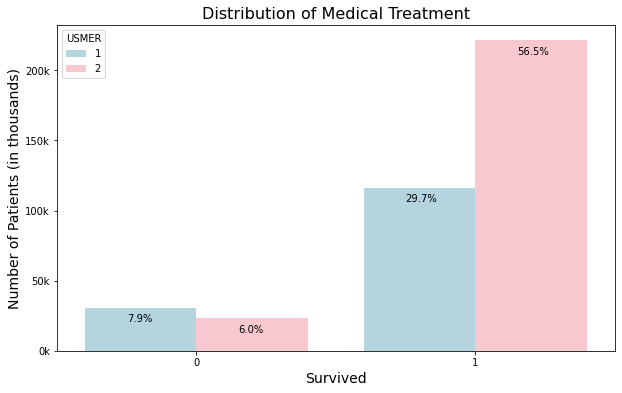

In [5]:
create_boolean_survival_plot(df = df, colname = 'USMER', 
                                ylabel = "Number of Patients (in thousands)", 
                                title = "Distribution of Medical Treatment")

<div align="justify">
1 for <strong>female</strong> and 2 for <strong>male</strong>.
    </div>

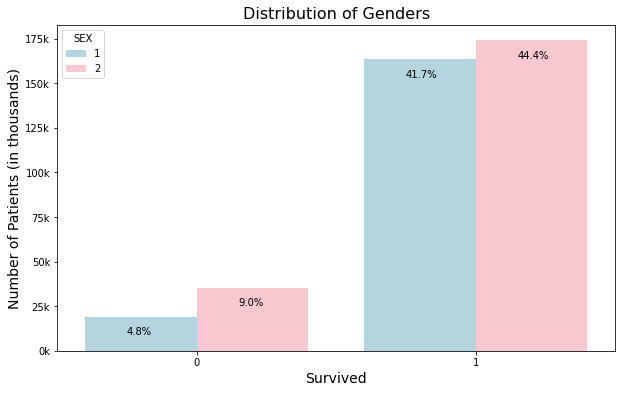

In [6]:
create_boolean_survival_plot(df = df, colname = 'SEX', 
                                ylabel = "Number of Patients (in thousands)", 
                                title = "Distribution of Genders")

<div align="justify">
<strong>PATIENT_TYPE</strong> contains data on the type of care that the patient received in the medical unit. <br>A value of <strong>1 indicates that the patient returned home</strong> after receiving care, while a value of <strong>2 indicates that the patient was hospitalized</strong>.
    </div>

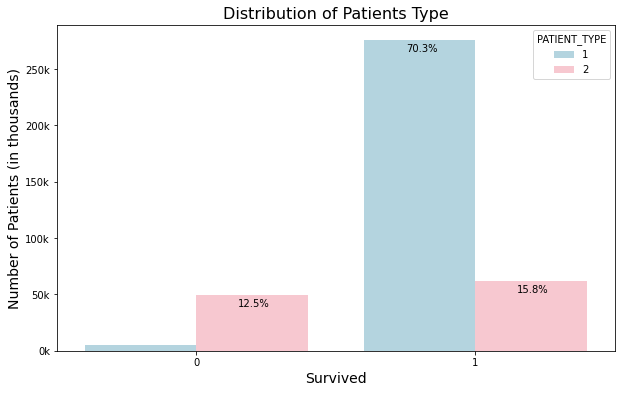

In [7]:
create_boolean_survival_plot(df = df, colname = 'PATIENT_TYPE', 
                                ylabel = "Number of Patients (in thousands)", 
                                title = "Distribution of Patients Type")

<div align="justify">
The boolean columns contain information on whether some phenomena happened or not. A value of 97 or 98 or 99 may indicate missing data.<br>Let's fix the values to be all in the same format
    </div>

In [8]:
# Fix the values
df['INTUBED'] = df['INTUBED'].map({1:1, 2: 0, 97: -1, 99: -1})
df['PNEUMONIA'] = df['PNEUMONIA'].map({1:1, 2: 0, 97: -1, 99: -1})

for i in range(list(df.columns).index('PREGNANT'), len(df.columns)):
    if df.columns[i] not in ['CLASIFFICATION_FINAL', 'SURVIVED']:
        df.iloc[:, i] = df.iloc[:, i].map({1:1, 2: 0, 97: -1, 98: -1, 99:-1})

<div align="justify">
    
<strong>INTUBED</strong> column contains information on whether the patient was connected to a ventilator or not. A value of <strong>1 in this column indicates that the patient was connected to a ventilator</strong>, while a value of <strong>0 indicates that the patient was not connected to a ventilator</strong>.
    </div>
    <br>
<div align="justify">  
Ventilators are medical devices that are used to help patients breathe when they are unable to do so on their own. They are often used in critical care situations, such as when a patient has a respiratory illness or has suffered a lung injury.
<br><br>
During the COVID-19 pandemic, ventilators have been used to treat some patients with severe cases of the disease. COVID-19 can cause inflammation and damage to the respiratory system, leading to difficulty breathing and a need for mechanical ventilation. Ventilators can help these patients by providing them with oxygen and assisting with their breathing.
<br><br>
Ventilator use has been a controversial topic during the COVID-19 pandemic, as there have been shortages of these devices in some areas, leading to difficult decisions about which patients should receive them. In addition, some experts have questioned the effectiveness of using ventilators for certain COVID-19 patients, as the evidence on their effectiveness is mixed.
<br><br>
Overall, the use of ventilators for COVID-19 patients can be an important treatment option for those with severe respiratory symptoms, but their use should be carefully considered and guided by evidence-based guidelines.
    </div>

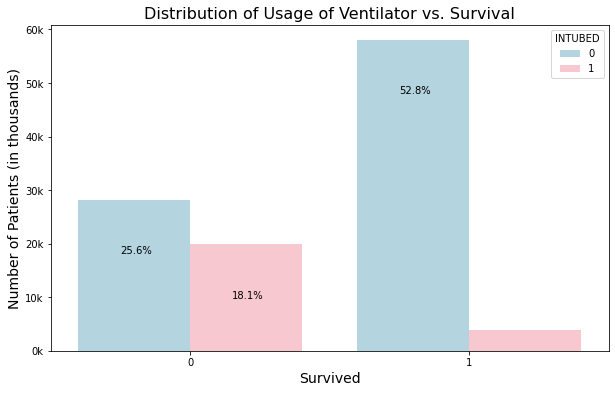

In [9]:
create_boolean_survival_plot(df = df, colname = 'INTUBED', 
                                ylabel = "Number of Patients (in thousands)", 
                                title = "Distribution of Usage of Ventilator vs. Survival")

<div align="justify">
<strong>PNEUMONIA</strong> column contains information on whether the patient already have air sacs inflammation or not. A value of <strong>1 in this column indicates that the patient had air sacs inflammation</strong>, while a value of <strong>0 indicates that the patient did not have air sacs inflammation</strong>.
    </div>
    <br>
<div align="justify"> 
Inflammation of the air sacs, also known as alveoli, is a condition in which the small, thin-walled sacs in the lungs that are responsible for exchanging oxygen and carbon dioxide become inflamed. This can cause a number of symptoms, including difficulty breathing, chest pain, and coughing.
<br><br>
There are several possible causes of air sacs inflammation, including infections (such as pneumonia), exposure to toxins or irritants (such as pollution or smoking), and autoimmune diseases (such as lupus). The severity of the inflammation can vary widely, from mild to severe, and treatment will depend on the underlying cause and the severity of the symptoms.
<br><br>
Mild cases of air sacs inflammation may be treated with medications such as corticosteroids and bronchodilators to reduce inflammation and improve breathing. Severe cases may require more aggressive treatment, such as oxygen therapy or mechanical ventilation (using a machine to help with breathing).
<br><br>
Overall, it is important to seek medical attention if you are experiencing symptoms of air sacs inflammation, as it can be a serious condition that requires prompt treatment.
    </div>

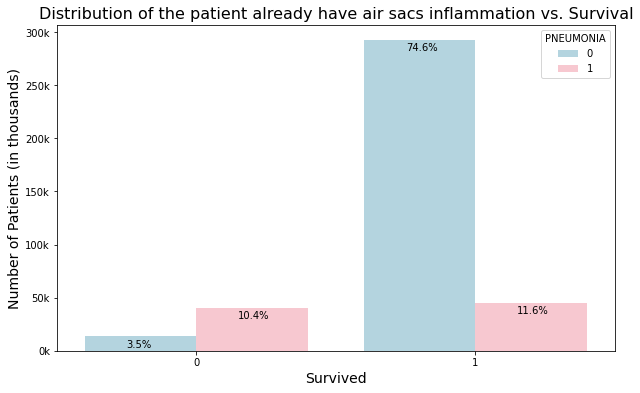

In [10]:
create_boolean_survival_plot(df = df, colname = 'PNEUMONIA', 
                                ylabel = "Number of Patients (in thousands)", 
                                title = "Distribution of the patient already have air sacs inflammation vs. Survival")

<div align="justify">
<strong>PREGNANT</strong> column contains information on whether the patient already is pregnant or not. A value of <strong>1 in this column indicates that the patient is pregnant</strong>, while a value of <strong>0 indicates that the patient is not pregnant</strong>.
    </div>

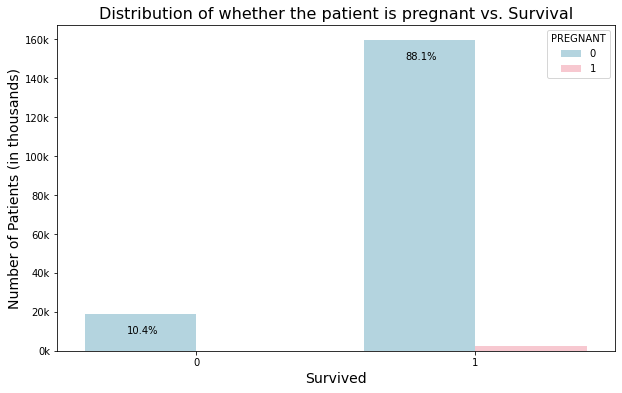

In [11]:
create_boolean_survival_plot(df = df, colname = 'PREGNANT', 
                                ylabel = "Number of Patients (in thousands)", 
                                title = "Distribution of whether the patient is pregnant vs. Survival")

<div align="justify">
<strong>DIABETES</strong> column contains information on whether the patient has diabetes or not. A value of <strong>1 in this column indicates that the patient has diabetes</strong>, while a value of <strong>0 indicates that the patient did not have diabetes</strong>.
    </div>
    <br>
<div align="justify"> 
Diabetes is a chronic condition that affects the way the body processes blood sugar (glucose). There are two main types of diabetes: type 1 and type 2.
<br><br>
In type 1 diabetes, the body's immune system attacks and destroys the cells that produce insulin, a hormone that helps regulate blood sugar levels. As a result, people with type 1 diabetes must take insulin injections or use an insulin pump to control their blood sugar levels.
<br><br>
In type 2 diabetes, the body becomes resistant to the effects of insulin, and the cells in the body do not use insulin properly. This leads to high blood sugar levels. Type 2 diabetes is often associated with being overweight or obese, and it is more common in older adults. It can often be managed through lifestyle changes, such as diet and exercise, although some people may also need to take medications to control their blood sugar levels.
<br><br>
Both types of diabetes can lead to serious health complications if left untreated, including heart disease, nerve damage, blindness, and kidney damage. It is important for people with diabetes to manage their condition carefully to reduce their risk of these complications.
    </div>

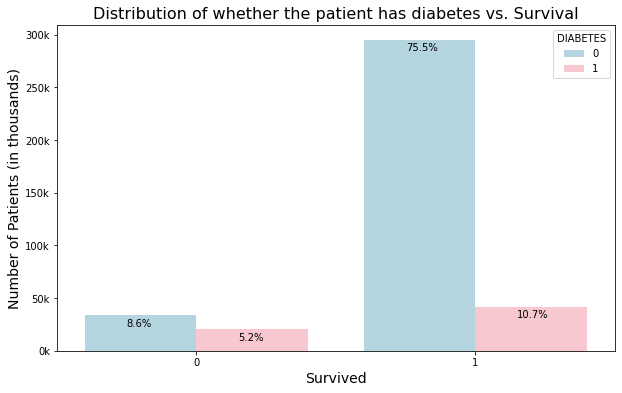

In [12]:
create_boolean_survival_plot(df = df, colname = 'DIABETES', 
                                ylabel = "Number of Patients (in thousands)", 
                                title = "Distribution of whether the patient has diabetes vs. Survival")

<div align="justify">
<strong>COPD</strong> column contains information on whether the patient has chronic obstructive pulmonary disease or not. A value of <strong>1 in this column indicates that the patient has chronic obstructive pulmonary disease</strong>, while a value of <strong>0 indicates that the patient did not have chronic obstructive pulmonary disease</strong>.
    </div>
    <br>
<div align="justify"> 
Chronic obstructive pulmonary disease (COPD) is a group of lung conditions that cause breathing difficulties. It includes conditions such as chronic bronchitis and emphysema.
<br><br>
In COPD, the airways in the lungs become damaged and narrowed, making it harder for air to flow in and out. This can cause symptoms such as shortness of breath, coughing, and wheezing. COPD is often caused by long-term exposure to irritants such as tobacco smoke, pollution, and certain types of dust.
<br><br>
COPD is a chronic condition, which means it is long-lasting and tends to get worse over time. It cannot be cured, but it can be managed through a combination of medications, lifestyle changes, and in some cases, oxygen therapy. It is important for people with COPD to receive proper treatment and follow their treatment plan to help manage their symptoms and improve their quality of life.
    </div>

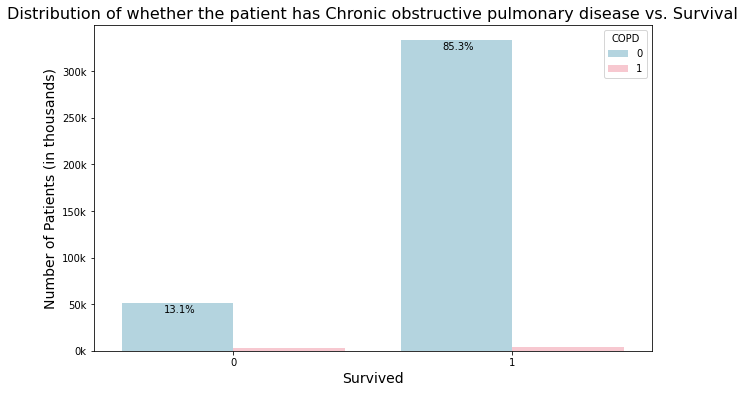

In [13]:
create_boolean_survival_plot(df = df, colname = 'COPD', 
                                ylabel = "Number of Patients (in thousands)", 
                                title = "Distribution of whether the patient has Chronic obstructive pulmonary disease vs. Survival")

<div align="justify">
<strong>ASTHMA</strong> column contains information on whether the patient has asthma or not. A value of <strong>1 in this column indicates that the patient has asthma</strong>, while a value of <strong>0 indicates that the patient did not have asthma</strong>.
    </div>
    <br>
<div align="justify"> 
Asthma is a chronic respiratory condition that causes the airways in the lungs to become inflamed, narrowed, and blocked with mucus. This can make it difficult to breathe and can cause symptoms such as coughing, wheezing, and shortness of breath.
<br><br>
Asthma is often triggered by environmental factors such as exposure to pollution, tobacco smoke, or certain types of dust. It can also be triggered by certain activities, such as exercise or exposure to cold air.
<br><br>
Asthma is a chronic condition that cannot be cured, but it can be managed through a combination of medications, lifestyle changes, and in some cases, inhalers or nebulizers to help open the airways. It is important for people with asthma to receive proper treatment and follow their treatment plan to help manage their symptoms and prevent asthma attacks.
    </div>

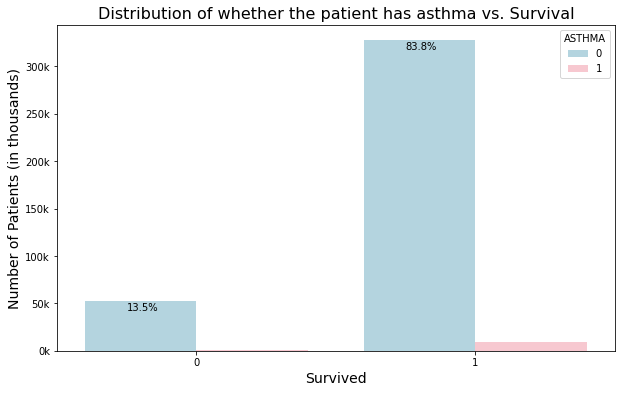

In [14]:
create_boolean_survival_plot(df = df, colname = 'ASTHMA', 
                                ylabel = "Number of Patients (in thousands)", 
                                title = "Distribution of whether the patient has asthma vs. Survival")

<div align="justify">
<strong>INMSUPR</strong> column contains information on whether the patient is immunosuppressed or not. A value of <strong>1 in this column indicates that the patient was immunosuppressed</strong>, while a value of <strong>0 indicates that the patient was not immunosuppressed</strong>.
    </div>
    <br>
<div align="justify"> 
Being immunosuppressed means that a person's immune system is not functioning as effectively as it should. This can make them more susceptible to infections and other diseases.
<br><br>
There are several reasons why a person might be immunosuppressed. Some people are born with a weak immune system or have a genetic condition that affects their immune function. Others may become immunosuppressed as a result of certain medical treatments, such as chemotherapy or radiation therapy for cancer, or due to the use of certain medications that suppress the immune system (such as corticosteroids or immunosuppressants).
<br><br>
Being immunosuppressed can be a serious concern, as it increases the risk of developing infections and other health problems. People who are immunosuppressed may need to take extra precautions to protect themselves from infections and may need to seek medical attention more quickly if they develop symptoms of an infection.
    </div>

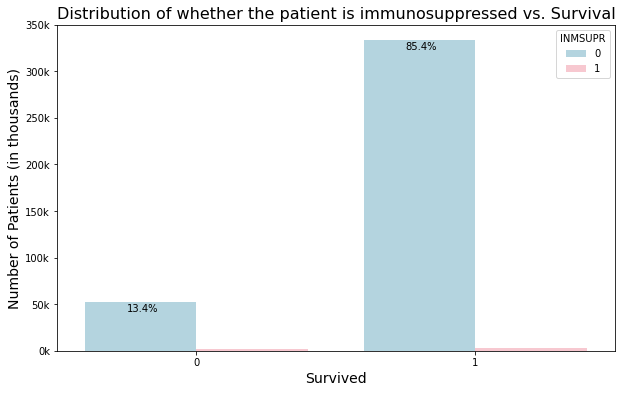

In [15]:
create_boolean_survival_plot(df = df, colname = 'INMSUPR', 
                                ylabel = "Number of Patients (in thousands)", 
                                title = "Distribution of whether the patient is immunosuppressed vs. Survival")

<div align="justify">
<strong>HIPERTENSION</strong> column contains information on whether the patient has hypertension or not. A value of <strong>1 in this column indicates that the patient has hypertension</strong>, while a value of <strong>0 indicates that the patient doesn't have hypertension</strong>.
    </div>
    <br>
<div align="justify"> 
Hypertension, also known as high blood pressure, is a condition in which the force of the blood against the artery walls is consistently too high. This can damage the arteries, the heart, and other organs and increase the risk of serious health problems such as heart attack, stroke, and kidney failure.
<br><br>
There are two main types of hypertension: essential hypertension and secondary hypertension. Essential hypertension, which is the most common type, has no known cause. Secondary hypertension, on the other hand, is caused by an underlying medical condition, such as kidney disease, sleep apnea, or hormonal imbalances.
<br><br>
Hypertension is often asymptomatic, meaning that it does not cause any obvious symptoms. It is often discovered during a routine medical check-up. It can be managed through a combination of lifestyle changes (such as diet and exercise) and medications. It is important for people with hypertension to have their blood pressure monitored regularly and to follow their treatment plan to help control their blood pressure and reduce their risk of serious health complications.
    </div>

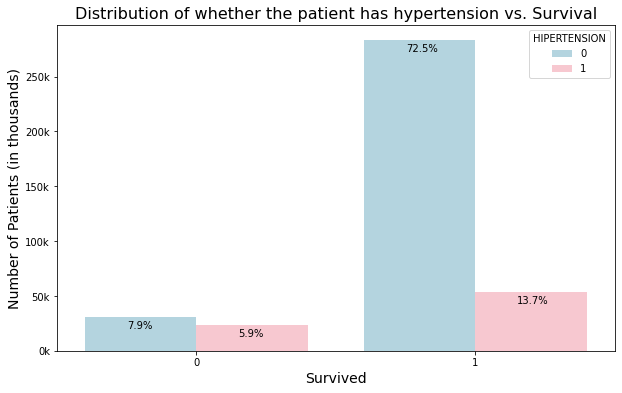

In [16]:
create_boolean_survival_plot(df = df, colname = 'HIPERTENSION', 
                                ylabel = "Number of Patients (in thousands)", 
                                title = "Distribution of whether the patient has hypertension vs. Survival")

<div align="justify">
<strong>OTHER_DISEASE</strong> column contains information on whether the patient has other diseases or not. A value of <strong>1 in this column indicates that the patient has other diseases</strong>, while a value of <strong>0 indicates that the patient doesn't have other diseases</strong>.
    </div>

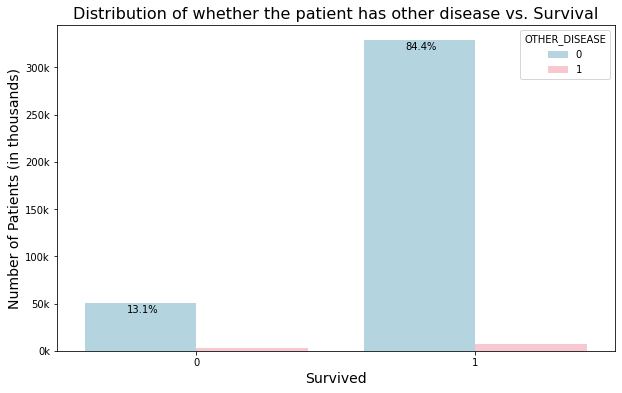

In [17]:
create_boolean_survival_plot(df = df, colname = 'OTHER_DISEASE', 
                                ylabel = "Number of Patients (in thousands)", 
                                title = "Distribution of whether the patient has other disease vs. Survival")

<div align="justify">
<strong>CARDIOVASCULAR</strong> column contains information on whether the patient has heart or blood vessels related disease or not. A value of <strong>1 in this column indicates that the patient has heart or blood vessels related disease</strong>, while a value of <strong>0 indicates that the patient doesn't have heart or blood vessels related disease</strong>.
    </div>
    <br>
<div align="justify"> 
Cardiovascular disease refers to a group of conditions that affect the heart and blood vessels, including heart disease, stroke, and hypertension (high blood pressure). Cardiovascular disease is a leading cause of death and disability worldwide.
<br><br>
There are several risk factors for cardiovascular disease, including high blood pressure, high cholesterol, smoking, obesity, physical inactivity, and diabetes. Some people are also at higher risk due to genetic factors or a family history of cardiovascular disease.
<br><br>
Preventing and managing cardiovascular disease involves a combination of lifestyle changes (such as eating a healthy diet, getting regular exercise, and not smoking) and medical treatments (such as medications to control blood pressure and cholesterol). It is important to be aware of your risk factors for cardiovascular disease and to take steps to reduce your risk, such as by making healthy lifestyle choices and seeking medical care when needed.
    </div>

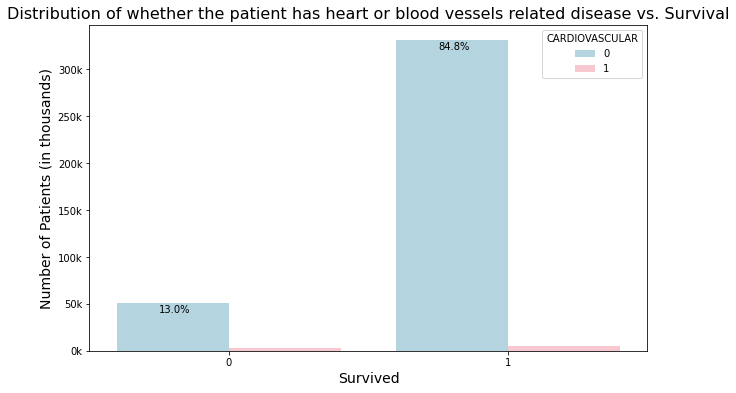

In [18]:
create_boolean_survival_plot(df = df, colname = 'CARDIOVASCULAR', 
                                ylabel = "Number of Patients (in thousands)", 
                                title = "Distribution of whether the patient has heart or blood vessels related disease vs. Survival")

<div align="justify">
<strong>OBESITY</strong> column contains information on whether the patient is obese or not. A value of <strong>1 in this column indicates that the patient is obese</strong>, while a value of <strong>0 indicates that the patient is not obese</strong>.
    </div>
    <br>
<div align="justify"> 
Obesity is a condition in which a person has an excessive amount of body fat. It is generally defined as having a body mass index (BMI) of 30 or higher. BMI is a measure of body fat based on height and weight.
<br><br>
Obesity is a major risk factor for a number of serious health conditions, including heart disease, diabetes, and stroke. It can also lead to other health problems such as joint pain, sleep apnea, and respiratory issues.
<br><br>
There are several factors that can contribute to obesity, including genetics, diet, physical activity levels, and certain medical conditions. Treating obesity often involves a combination of lifestyle changes (such as diet and exercise) and in some cases, medication or weight loss surgery. It is important for people who are obese to seek medical care and make lifestyle changes to reduce their risk of developing obesity-related health problems.
    </div>

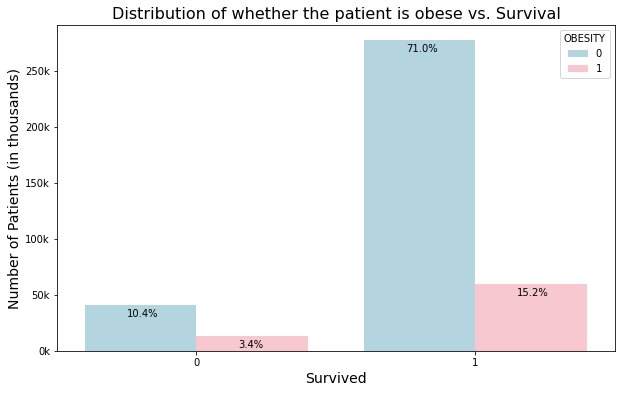

In [19]:
create_boolean_survival_plot(df = df, colname = 'OBESITY', 
                                ylabel = "Number of Patients (in thousands)", 
                                title = "Distribution of whether the patient is obese vs. Survival")

<div align="justify">
<strong>RENAL_CHRONIC</strong> column contains information on whether the patient has chronic renal disease or not. A value of <strong>1 in this column indicates that the patient has chronic renal disease</strong>, while a value of <strong>0 indicates that the patient did not have chronic renal disease</strong>.
    </div>
    <br>
<div align="justify"> 
Chronic renal failure, also known as chronic kidney disease, is a condition in which the kidneys are unable to filter waste and excess fluids from the blood effectively. This can lead to a buildup of toxins in the body and can cause a number of serious health problems.
<br><br>
Chronic renal failure is a progressive condition, which means it tends to get worse over time. It is often caused by other conditions that damage the kidneys, such as high blood pressure, diabetes, and lupus.
<br><br>
Symptoms of chronic renal failure may include fatigue, swelling in the hands and feet, loss of appetite, and changes in urination. Treatment may involve medications, lifestyle changes (such as diet and exercise), and in some cases, dialysis (a treatment that uses a machine to filter waste and excess fluids from the blood) or kidney transplantation. It is important for people with chronic renal failure to receive proper medical care and follow their treatment plan to help manage their condition and prevent further damage to the kidneys.
    </div>

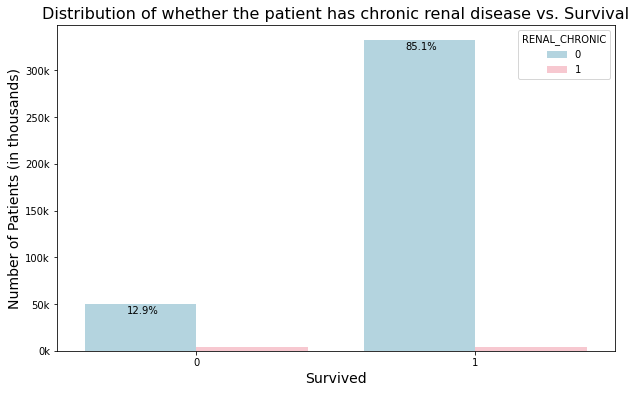

In [20]:
create_boolean_survival_plot(df = df, colname = 'RENAL_CHRONIC', 
                                ylabel = "Number of Patients (in thousands)", 
                                title = "Distribution of whether the patient has chronic renal disease vs. Survival")

<div align="justify">
<strong>TOBACCO</strong> column contains information on whether the patient the patient is a tobacco user or not. A value of <strong>1 in this column indicates that the patient is a tobacco user</strong>, while a value of <strong>0 indicates that the patient is not a tobacco user</strong>.
    </div>

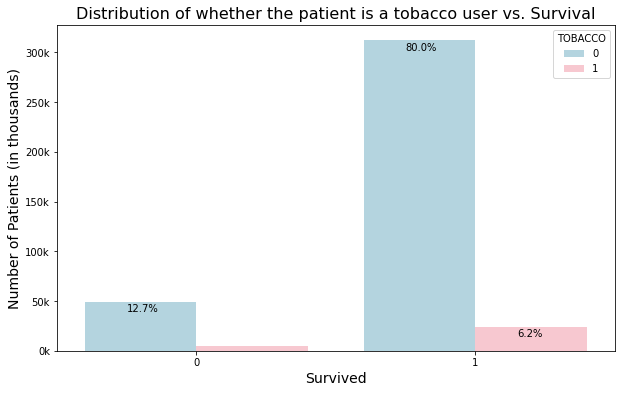

In [21]:
create_boolean_survival_plot(df = df, colname = 'TOBACCO', 
                                ylabel = "Number of Patients (in thousands)", 
                                title = "Distribution of whether the patient is a tobacco user vs. Survival")

<div align="justify">
<strong>ICU</strong> column contains information on whether the patient the patient had been admitted to ICU or not. A value of <strong>1 in this column indicates that the patient had been admitted to ICU</strong>, while a value of <strong>0 indicates that the patient had not been admitted to ICU</strong>.
    </div>
    <br>
<div align="justify"> 
ICU stands for intensive care unit, also known as a critical care unit. It is a specialized hospital unit that provides close monitoring and support to patients with serious or life-threatening conditions.
<br><br>
ICUs are typically staffed by highly trained healthcare professionals, including doctors, nurses, and other specialists. They are equipped with advanced medical technology, such as mechanical ventilators (to help patients breathe) and monitor patients' vital signs (such as heart rate and blood pressure) closely.
<br><br>
Patients in the ICU may be critically ill or injured and may require close monitoring and support to help them recover. They may have a variety of conditions, including heart attacks, strokes, trauma injuries, or serious infections.
<br><br>
ICU care can be expensive and is often reserved for patients who are critically ill and require close monitoring and support to help them recover. It is an important resource for patients who need specialized care and support during a serious illness or injury.
    </div>

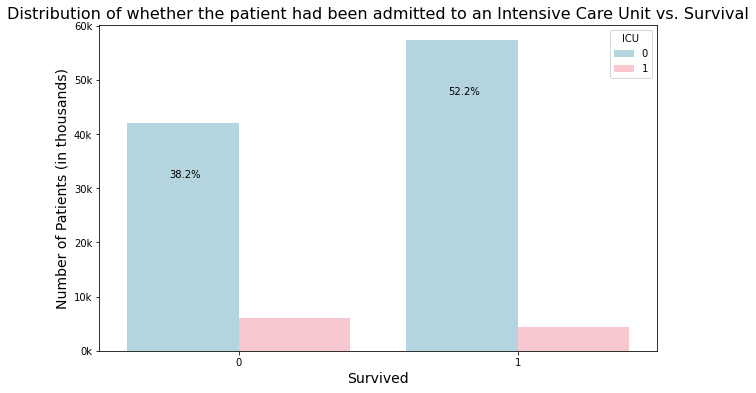

In [22]:
create_boolean_survival_plot(df = df, colname = 'ICU', 
                                ylabel = "Number of Patients (in thousands)", 
                                title = "Distribution of whether the patient had been admitted to an Intensive Care Unit vs. Survival")

<html>
<body>
    <div align="justify">
  <h1>Correlation Matrix</h1>
    <br>
A correlation matrix is a table or matrix that shows the statistical relationship between a set of variables. It is a useful tool for understanding the relationships between variables and for identifying patterns in data.
    <br><br>
  <h2>Why is Correlation Matrix important?</h2>
        <br>
In a correlation matrix, each variable is listed on both the rows and columns of the table, and the cells of the table show the correlation between the variables. A correlation coefficient (a value between -1 and 1) is used to indicate the strength and direction of the relationship between the variables. A coefficient of 1 indicates a strong positive correlation, a coefficient of -1 indicates a strong negative correlation, and a coefficient of 0 indicates no correlation.<br><br>
Correlation matrices are used in a variety of fields, including statistics, finance, and psychology, to help understand and analyze data. They can be particularly useful in identifying relationships between variables that may not be immediately obvious and in identifying patterns in data that may be useful in predicting future outcomes.<br><br>
Overall, correlation matrices are an important tool for understanding and analyzing data and for identifying patterns and relationships in data.
        </div>
</body>
</html>

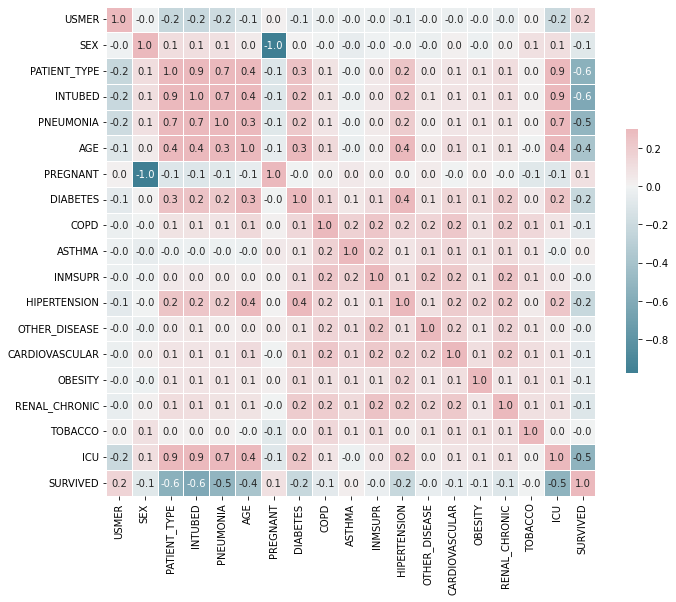

In [23]:
# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.1f')

# Show the plot
plt.show()

<html>
<body>
    <div align="justify">
  <h1>The baseline model</h1>
    <br>
A baseline model is a model that is used as a reference point against which other models can be compared. It is a simple model that is built using minimal effort and resources, and it is used as a benchmark to see how much improvement can be achieved through more advanced modeling techniques.
    <br><br>
  <h2>Why is the baseline model important?</h2>
        <br>
Baseline models are often used in machine learning and other areas to establish a baseline performance for a given problem. For example, in a classification problem, a baseline model might be a simple model that always predicts the most common class. This model would serve as a baseline, and any other model that performs better than this baseline model would be considered an improvement.<br><br>
Baseline models can be useful for identifying the minimum performance that is acceptable for a given problem and for identifying areas where more advanced modeling techniques may be needed. They can also help to establish a baseline performance that can be used to compare the performance of different models and evaluate which model is the most effective.<br><br>
        
  <h2>Binary classification</h2>
        <br>
Binary classification is a type of classification in which there are only two classes. For example, a binary classification problem might involve predicting whether a patient has a disease or not, or whether an email is spam or not spam.<br><br>
In the context of predicting the <strong>survival</strong> of people who had covid, binary classification could be used to predict whether a person with covid will survive or not survive. The model would be trained on a dataset of people who had covid and the outcome (survival or not), and it would use features such as age, gender, underlying health conditions, and other relevant factors to make predictions.<br><br>
      
  <h2>Split data into training/test</h2>
        <br>
<strong>train_test_split</strong> is a function in scikit-learn that can be used to split a dataset into two subsets: a training set and a test set. The training set is used to train a machine learning model, while the test set is used to evaluate the performance of the model.<br><br>
The reason why it is important to use train_test_split is that it helps to avoid overfitting. Overfitting occurs when a model is trained too well on the training data and performs poorly on new, unseen data. By splitting the data into a training set and a test set, we can ensure that the model is not overfitting by evaluating its performance on the test set, which is unseen during the training process.<br><br>
        
</div>
</body>
</html>

In [24]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df.drop('SURVIVED', axis=1)
y = df['SURVIVED']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313583, 18), (78396, 18), (313583,), (78396,))

<html>
<body>
    <div align="justify">
  <h1>The model evaluation</h1>
    <br>
Model evaluation is an important step in the machine learning process, especially in the context of binary classification. Binary classification involves predicting one of two classes, and it is commonly used in a variety of applications, such as predicting whether a patient has a disease or not, or whether an email is spam or not spam. When evaluating the performance of a binary classifier, several metrics can be used to measure how well the model is able to predict the two classes.
    <br><br>
  <h2>Accuracy</h2>
        <br>
Accuracy is the most basic and intuitive metric for evaluating the performance of a binary classifier. It is defined as the number of correct predictions made by the model divided by the total number of predictions. For example, if a model makes 100 predictions and 75 of them are correct, the accuracy of the model is 75%.<br><br>
<p style="text-align: center;">Accuracy = $\frac{\text{number of correct predictions}}{\text{total number of predictions}} = \frac{TP+TN}{TP+TN+FP+FN}$</p>
        
  <h2>Precision</h2>
        <br>
Precision is a metric that measures the proportion of true positive predictions made by the model. In other words, it is the number of true positive predictions made by the model divided by the total number of positive predictions made by the model. Precision is often used as a metric in imbalanced classification problems, where one class is more common than the other. For example, in a problem where the negative class is much more common than the positive class, a model with high precision would be able to correctly identify the positive class most of the time, even if it also wrongly identifies some negative instances as positive.<br><br>
<p style="text-align: center;">Precision = $\frac{TP}{TP+FP}$</p>
        
  <h2>Recall</h2>
        <br>
Recall is a metric that measures the proportion of true positive predictions made by the model compared to the total number of positive instances in the data. It is defined as the number of true positive predictions made by the model divided by the total number of positive instances in the data. Recall is often used as a metric in imbalanced classification problems, where it is important to identify as many instances of the minority class as possible. For example, in a problem where the negative class is much more common than the positive class, a model with high recall would be able to identify most of the positive instances in the data, even if it also wrongly identifies some negative instances as positive.<br><br> 
<p style="text-align: center;">Recall = $\frac{TP}{TP+FN}$</p>
        
  <h2>F1 Score</h2>
        <br>
The F1 score is a metric that combines precision and recall into a single score. It is defined as the harmonic mean of precision and recall, and is calculated as follows:<br><br>
<p style="text-align: center;">F1 Score = $\frac{2\times\text{Precision}\times\text{Recall}}{\text{Precision}+\text{Recall}} = \frac{2\times TP}{2\times TP+FP+FN}$</p><br><br>
The F1 score is a useful metric for evaluating the performance of a binary classifier, especially in imbalanced classification problems. It takes into account both the precision and recall of the model, and is more sensitive to changes in either of these metrics than either metric alone. A model with a high F1 score is able to make both accurate and precise predictions, and is generally considered to be a good model.<br><br>     
      
</div>
</body>
</html>

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    """
    This function takes a trained model, X_test and y_test as input and evaluate the model using
    accuracy, precision, recall, and f1 score and return these evaluation metrics.
    It is flexible enough to handle different types of models from sklearn and print the results including the type of the model.
    
    Parameters:
    - model : a scikit-learn model object, the model should be trained before calling this function
    - X_test : array-like or dataframe, the feature set of the test data
    - y_test : array-like or series, the labels of the test data
    
    Returns:
    - The list of the prediction and the metrics
    """
    # get the type of model
    model_type = type(model).__name__

    y_pred = model.predict(X_test)
    
    # calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # print the results
    print("Model Type:", model_type)
    print("Accuracy: {:.4f}".format(accuracy))
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1 Score: {:.4f}".format(f1))
    
    return [y_pred, accuracy, precision, recall, f1]

<html>
<body>
    <div align="justify">
<h2>AUC-ROC</h2>
        <br>
The AUC-ROC (Area Under the Receiver Operating Characteristic Curve) is a metric that measures the performance of a binary classifier. It is calculated by plotting the true positive rate against the false positive rate for different classification thresholds. A model with an AUC-ROC of 1.0 is considered a perfect classifier, while a model with an AUC-ROC of 0.5 is considered no better than random guessing.<br><br> 

</div>
</body>
</html>

In [26]:
from sklearn.metrics import roc_curve, auc

def plot_auc_roc(y_test, y_pred):
    """
    This function takes y_test and y_pred as input and plots the AUC-ROC curve
    using matplotlib and sklearn.roc_auc_score.
   
    Parameters:
    - y_test : array-like or series, true binary labels
    - y_pred : array-like or series, predicted binary labels as returned by a classifier
    
    Returns:
    - None
    """
    # Compute the AUC-ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Set the figure size and font size
    plt.figure(figsize=(8, 6), dpi=80)
    plt.rcParams.update({'font.size': 12})

    # Plot the AUC-ROC curve
    plt.plot(fpr, tpr, color='lightblue', lw=2, label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='lightpink', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

    # Show the plot
    plt.show();

<html>
<body>
    <div align="justify">
<h2>Logistic Regression</h2>
        <br>
Logistic regression is a linear model for binary classification, which means it is used to predict one of two possible outcomes (e.g. 0 or 1, true or false, etc.). The basic idea behind logistic regression is that it models the probability of the positive class (the class we're interested in) given a set of input features, using a logistic function.<br><br>
The logistic function, also known as the sigmoid function, is defined as:
$$P(y=1|x) = \frac{1}{1+e^{-\beta^Tx}}$$

Where
$P(y=1|x)$ is the probability of the positive class given the input features $x$ is the input feature vector $\beta$ is the weight vector $e^{-\beta^Tx}$ is the exponential term.<br><br>
The logistic function maps any input value to a value between 0 and 1, which can be interpreted as a probability. So, the output of the logistic function is the estimated probability of the positive class.<br><br> 
The logistic function maps any input value to a value between 0 and 1, which can be interpreted as a probability. So, the output of the logistic function is the estimated probability of the positive class.<br><br>
To make predictions with a logistic regression model, we use a threshold. If the estimated probability of the positive class is greater than the threshold, we predict the positive class; otherwise, we predict the negative class.<br><br>
To train a logistic regression model, we need a dataset that includes the input features as well as the binary labels. We use an optimization algorithm such as gradient descent to find the optimal values of the weight vector $\beta$ that maximizes the likelihood of the observed labels given the input features.<br><br>
It's a widely used classifier because of its interpretability, fast computation and reasonable results with linear decision boundary. However, it has a big limitation that it cannot handle non-linearly separable data and it assumes the independence between features which is not always true.<br><br>
</div>
</body>
</html>

Model Type: LogisticRegression
Accuracy: 0.9103
Precision: 0.9353
Recall: 0.9624
F1 Score: 0.9487


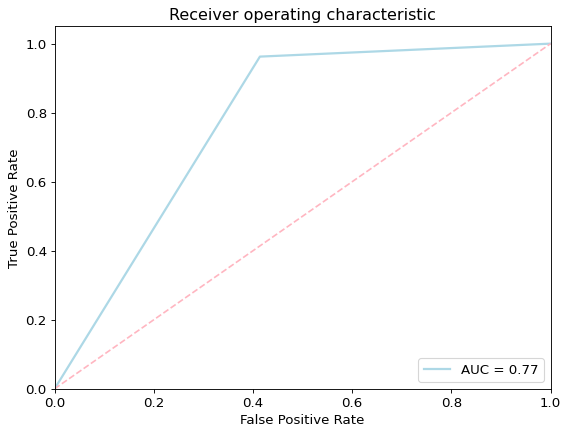

In [27]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression classifier and fit it to the training data
logreg = LogisticRegression(random_state=42, 
                            max_iter=500).fit(X_train, y_train)

# Calculate the metrics of the model
logreg_metrics = evaluate_model(logreg, X_test, y_test)

# Plot AUC-ROC graph
plot_auc_roc(y_test, logreg_metrics[0])

<html>
<body>
    <div align="justify">
<h2>Decision Tree classifier</h2>
        <br>
Decision Trees are a type of supervised machine learning models that can be used for both classification and regression tasks. The main idea behind decision trees is to recursively split the data into subsets based on the values of the input features. The splitting continues until a stopping criterion is met.<br><br>
A decision tree classifier starts by choosing a feature and a threshold for splitting the data. The feature and threshold that provide the most separation between the classes are chosen. The process is then repeated on the subsets created by the split, and this continues until a stopping criterion is met, for example maximum depth of the tree is reached, or the size of the leaf node is less than a minimum number.<br><br>
At each node of the tree, a decision is made based on the feature and threshold that was chosen at that node. Each branch of the tree corresponds to a possible outcome of the decision. A leaf node in the tree represents a prediction of the output class.<br><br> 
The decision tree algorithm is a greedy algorithm, it tries to find the best decision at each step by using a criterion such as information gain, gini impurity, or reduction in variance.<br><br> 
Information gain is the most common criterion for decision tree, it measures the decrease in impurity after a split, and it's defined by this formula:<br>
$$\text{Information Gain} = I(\text{parent}) - \sum_{i=1}^{n} \frac{N_i}{N} I(\text{child}_i)$$<br>
where:
$I(\text{parent})$ is the impurity of the parent node
$I(\text{child}_i)$ is the impurity of the i-th child node $N_i$ is the number of samples in the i-th child node $N$ is the total number of samples

Decision trees are simple to understand and interpret, also they are computationally fast and easy to train, and they can handle both categorical and numerical features.<br><br> 



</div>
</body>
</html>

Model Type: DecisionTreeClassifier
Accuracy: 0.8984
Precision: 0.9343
Recall: 0.9488
F1 Score: 0.9415


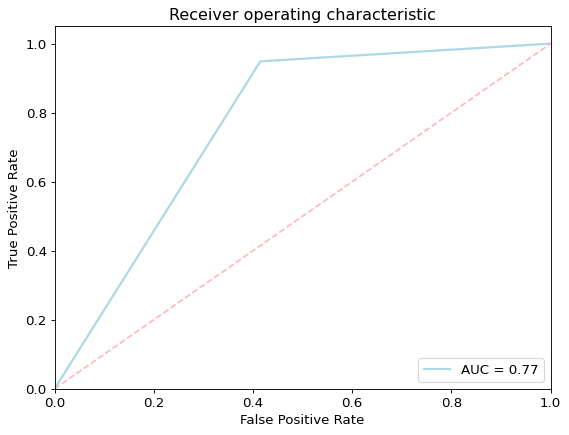

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Create the decision tree classifier and fit it to the training data
decTree = DecisionTreeClassifier().fit(X_train, y_train)

# Calculate the metrics of the model
decTree_metrics = evaluate_model(decTree, X_test, y_test)

# Plot AUC-ROC graph
plot_auc_roc(y_test, decTree_metrics[0])

<html>
<body>
    <div align="justify">
<h2>Random Forest</h2>
        <br>
Random Forest is an ensemble method based on decision trees, it combines multiple decision trees to improve the predictive accuracy and control over-fitting. The idea behind random forest is to build multiple decision trees using different subsets of the training data and then aggregate the predictions of the individual trees to make the final prediction.<br><br>
Random Forest algorithm works by:
<li>Selecting a random subset of the data for each tree</li>
<li>Selecting a random subset of the features for each split</li><br>
At each internal node of each tree in the forest, the algorithm selects a random subset of the features and selects the best feature among the subset to split the node. In this way, each tree in the forest can focus on different features and capture different patterns in the data.<br><br> 
Random Forest is trained by:<li>Repeatedly drawing a sample with replacement of the data (Bootstrap Aggregating)</li>
<li>Growing a decision tree to the sample</li><br>
In the end, the final prediction is done by averaging the predictions of all the decision trees (for regression) or by taking the majority vote of the predictions of all the decision trees (for classification)<br><br> 
Random Forest is a powerful algorithm that often performs better than a single decision tree, it is also more robust to overfitting, as it averages multiple trees' predictions, also it's less sensitive to the choice of the features used for splitting the nodes. However, it can be more complex to interpret and understand the predictions of random forest compared to a single decision tree.<br><br> 
In conclusion, Random Forest is a strong and stable algorithm for both regression and classification problem that achieves high accuracy and balance out the overfitting risk of decision trees.<br><br> 
</div>
</body>
</html>

Model Type: RandomForestClassifier
Accuracy: 0.9383
Precision: 0.9528
Recall: 0.9767
F1 Score: 0.9646


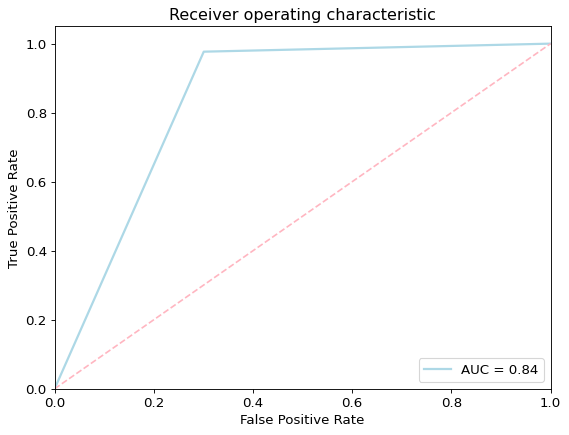

In [29]:
from sklearn.ensemble import RandomForestClassifier


randForestClf = RandomForestClassifier(n_estimators=100, 
                                       random_state=42).fit(X, y)

# Calculate the metrics of the model
randForestClf_metrics = evaluate_model(randForestClf, X_test, y_test)

# Plot AUC-ROC graph
plot_auc_roc(y_test, randForestClf_metrics[0])

<html>
<body>
    <div align="justify">
<h2>Naive Bayes</h2>
        <br>
Naive Bayes is a family of probabilistic algorithms based on Bayes' Theorem. It is a simple and fast algorithm that is often used for text classification and spam filtering.<br><br>
There are several types of Naive Bayes algorithms, but the most commonly used ones are:
<li>Gaussian Naive Bayes: It assumes that the continuous features follow a Gaussian distribution and it's mostly used for classification problems</li>
<li>Multinomial Naive Bayes: It is used for discrete data, such as text classification, and it's based on the idea of representing text as a bag of words and counting the number of occurrences of each word in the text</li><li>Bernoulli Naive Bayes: Similar to multinomial naive bayes, but it's based on binary occurrence of the feature rather than count</li><br>
All versions of Naive Bayes algorithms share a common assumption, which is that the features are conditionally independent given the class label. This means that the presence or absence of a particular feature in the input is unrelated to the presence or absence of any other feature.<br><br> 
The basic idea behind Naive Bayes is to use Bayes' Theorem to calculate the conditional probability of each class given the input features, and then to classify the input to the class with the highest probability.<br><br> 
Bayes' theorem, named after Reverend Thomas Bayes, is a fundamental statistical concept that describes the probability of an event occurring, given that another event has occurred. The theorem is used to update our belief in an event or hypothesis based on new information. It is commonly used in statistical classification problems, such as spam filtering, text classification, and image recognition.<br><br>
Bayes' theorem can be written as:<br>
$$ P(y|x) = \frac{P(x|y)P(y)}{P(x)} $$
<br> 
Where:<br>
$P(y|x)$ is the probability of class y given the input x (posterior probability) <br>$P(x|y)$ is the likelihood, represents the probability of x given y
<br>$P(y)$ is the prior probability of the class y.<br>$P(x)$ is is the probability of class x, which is the total probability of event x in the sample space.<br><br>
The basic idea behind Bayes' theorem is that we start with some prior belief, represented by $P(y)$, and we update that belief based on new information, represented by $P(x|y)$. The likelihood, $P(x|y)$, represents the probability of the new information given our current belief, and the prior probability of the new information, $P(x)$, represents the total probability of that information in the sample space. Dividing the likelihood by the prior probability of the new information scales the likelihood by the degree to which the new information is relevant to our current belief.<br><br>It's also important to note that it only applies for the condition that events $Y$ and $X$ are conditionally independent, meaning that the probability of one event occurring is not affected by the occurrence of the other event.<br><br>
It is a powerful technique because it allows us to update our beliefs in light of new evidence, which is important in many real-world scenarios.

</div>
</body>
</html>

Model Type: BernoulliNB
Accuracy: 0.8947
Precision: 0.9278
Recall: 0.9519
F1 Score: 0.9397


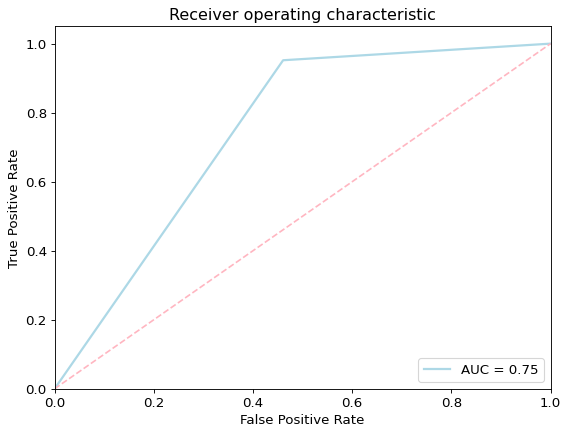

In [30]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB().fit(X_train, y_train)

# Calculate the metrics of the model
bnb_metrics = evaluate_model(bnb, X_test, y_test)

# Plot AUC-ROC graph
plot_auc_roc(y_test, bnb_metrics[0])

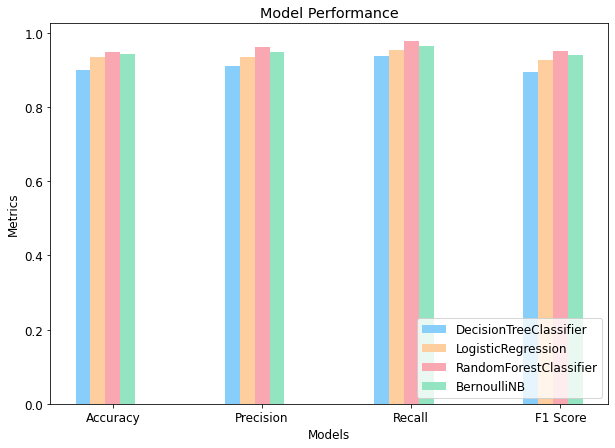

In [31]:
df_metrics = pd.DataFrame(
    [decTree_metrics[1:], logreg_metrics[1:], randForestClf_metrics[1:], bnb_metrics[1:]], 
    columns= ['DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier', 'BernoulliNB'], 
    index = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])



# get the number of models
num_models = df_metrics.shape[0]

# get the number of metrics
num_metrics = df_metrics.shape[1]

# the x locations for the groups
ind = np.arange(num_models)

# the width of the bars
width = 0.1

light_colors = ['#87CEFA','#FFCE9F','#F9A7B0','#93e4c1']

# initialize a list to hold the bars
bars = []
plt.figure(figsize = (10, 7))
# create a bar for each metric
for i in range(num_metrics):
    # get the data for this metric
    data = df_metrics.iloc[:, i]
    # create a bar for this metric
    bar = plt.bar(ind + i * width, data, width, color = light_colors[i])
    # add the bar to the list of bars
    bars.append(bar)

# add the labels for the x and y axes
plt.xlabel('Models')
plt.ylabel('Metrics')

# add a title
plt.title('Model Performance')

# add the x ticks (model names)
plt.xticks(ind + width * num_metrics / 2, df_metrics.index)

# add a legend
plt.legend([bar[0] for bar in bars], df_metrics.columns, loc = 'lower right')

# display the plot
plt.show()

<html>
<body>
    <div align="justify">
<h2>And the winner is:</h2>
        <br>
Random Forest Classifier<br><br>
</div>
</body>
</html>

<html>
<body>
    <div align="justify">
<h2>The Confusion Matrix</h2>
        <br>
A confusion matrix is a table that is often used to describe the performance of a classification algorithm, particularly in binary classification problems. A confusion matrix will have four entries, corresponding to the number of true positives, true negatives, false positives, and false negatives. These four entries will have the following meanings:<br><br>

<li><strong>True positives (TP)</strong>: The number of instances that are positive (i.e., belong to the positive class) and are correctly classified as positive.</li>
<li><strong>True negatives (TN)</strong>: The number of instances that are negative (i.e., belong to the negative class) and are correctly classified as negative.</li><li><strong>False positives (FP)</strong>: The number of instances that are negative but are incorrectly classified as positive. Also known as Type I error or false alarm.</li><li><strong>False negatives (FN)</strong>: The number of instances that are positive but are incorrectly classified as negative. Also known as Type II error or miss.</li><br>
The confusion matrix is important because it gives you an idea of how well your classification algorithm is performing. You can use the entries in the matrix to compute various performance metrics, such as accuracy, precision, recall, and F1-score.<br><br> 
Additionally, the confusion matrix is also useful for identifying which types of mistakes the model is making and where it needs improvement. For example, if your model has a high number of false negatives, it means that it's missing a lot of positive examples, whereas a high number of false positives indicates that it's flagging too many negative examples as positive. By understanding the patterns in the confusion matrix, you can adjust your model's settings or feature engineering to improve its performance.<br><br>
In summary, the confusion matrix is a powerful tool for evaluating the performance of a binary classifier, as it allows you to compute a variety of performance metrics, which are important to understand the performance of a model and help in identifying the areas of improvement.<br><br>

</div>
</body>
</html>

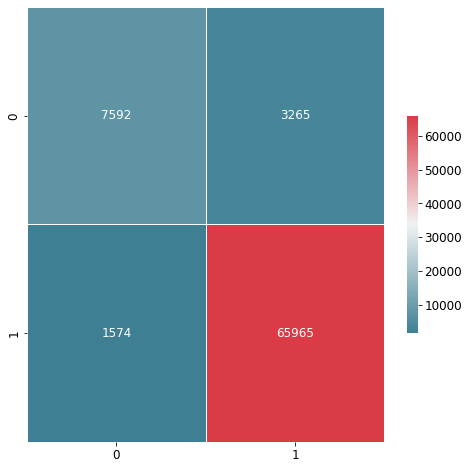

In [32]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, randForestClf_metrics[0])

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(conf_matrix, cmap=cmap, annot=True, fmt='d', linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot
plt.show()

<html>
<body>
    <div align="justify">
<h2>Feature importance</h2>
        <br>
Feature importance is a measure of how much a feature contributes to the performance of a machine learning model. It is a useful tool for understanding which features are most important in predicting the target variable, and can help inform feature selection and feature engineering strategies.<br><br> 
Feature importance is important because it helps identify the most important features in a dataset and allows you to focus on improving the prediction accuracy of those features. It can also help you identify and remove redundant or noisy features that may be negatively impacting model performance.
</div>
</body>
</html>



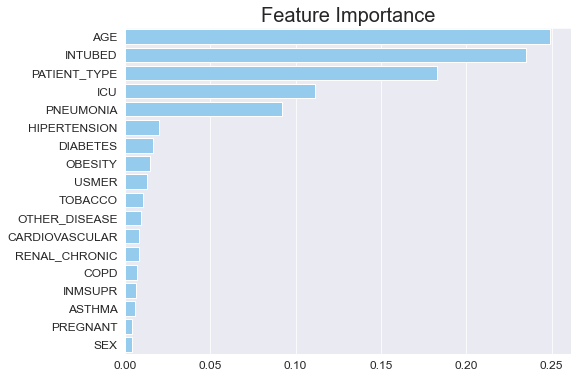

In [33]:
# Feature names
features = X_train.columns.to_list()

# Feature importances
importances = randForestClf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange the feature names so they match the sorted feature importances
names = [features[i] for i in indices]

# Set the plot style
sns.set_style("darkgrid")

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the plot
sns.barplot(x=importances[indices], y=names, color=light_colors[0])

# Add the plot title
plt.title("Feature Importance", fontsize=20)

# Show the plot
plt.show()

<html>
<body>
    <div align="justify">
<h2>Age has the highest importance!</h2>
        <br>
When AGE is found to have the highest importance in a feature importance analysis, it means that the age feature is <strong>highly informative</strong> and informative in regards to the target variable (survival) in a classification problem. This means that, when predicting the target variable, the age of the individuals plays a crucial role and can be used to predict the outcome accurately.<br><br> 
<table>
  <tr>
    <th>Feature</th>
    <th>Correlation with Survival</th>
  </tr>
  <tr>
    <td>AGE</td>
    <td>-0.397807</td>
  </tr>
</table>

Comparing this feature importance with the correlation between AGE and the target can help us to further understand its importance. If the correlation between AGE and the target is high, this suggests that the older individuals are more likely to belong to one class or the other. This, in combination with the feature importance, suggests that the age feature is a strong predictor of the target variable.<br><br>
However, if the correlation is low, then the age feature may not be as good of a predictor, but it could still have a high importance because it may interact with other features to make predictions more accurate. This can be thought of as the feature that interact with the others, it does not have a direct correlation but by interacting with other features it make predictions more accurate.<br><br> 
A correlation of -0.397807 between AGE and the target variable indicates a moderate negative correlation. This means that as the value of AGE increases, the likelihood of the target variable taking on a certain value decreases. Therefore, older individuals are less likely to belong to one class of the binary classification problem. In other words, based on the analysis, older individuals are less likely to survive from COVID-19.<br><br>
When combined with the high feature importance of AGE, this suggests that the age feature plays an important role in the classification problem, despite the fact that it has a negative correlation with the target variable. This may indicate that the age feature interacts with other features in a way that allows the classifier to make more accurate predictions.<br><br>
It's worth noting that <strong>negative correlation does not always mean that older people are less likely to belong to one class</strong>, it could also depend on what the classes are, like in a life insurance scenario where older people are less likely to be covered. Also, AGE as a feature alone can not tell the whole story, it might have <strong>interaction with other features</strong> which help in making the predictions more accurate. It is also important to verify that the feature importance is calculated from appropriate method to understand the relationship between feature and the target variable.<br><br>
It's worth noting that feature importance and correlation are two different measurements and should be used together to understand the relationship between a feature and the target variable. Additionally, it's also important to consider the context of the problem and any other information you have about the data when interpreting the results.<br><br> 
</div>
</body>
</html>



<html>
  <body>
    <h3>About the Author</h3>
    <p>
        This notebook was written by <strong>Mehrzad Jafari</strong>.<br> Mehrzad is a data scientist with years of experience in the field. He has a strong background in machine learning and data analysis, and is skilled in using a variety of tools and technologies to extract insights from data.
    </p>
    <h4>Rights to Use</h4>
    <p>
      Mehrzad has the rights to use the content of this notebook for any purpose. He has worked hard to create this content, and is proud to share it with others. If you would like to use or reproduce the content of this notebook, please contact Mehrzad for permission.
    </p>
  </body>
</html>
